In [2]:
import pandas as pd 
import numpy as np

import os

import matplotlib.pyplot as plt

In [3]:
games_data = pd.read_csv(os.path.join('data', 'games.csv'))
player_data = pd.read_csv(os.path.join('data', 'players.csv'))
plays_data = pd.read_csv(os.path.join('data', 'plays.csv'))
tackles_data = pd.read_csv(os.path.join('data', 'tackles.csv'))

# Calculating Football Distances

## Adding Football Distances to Data

Calculates the distance from the football for each player at each frame, this is 
done for each week.

The data is saved in the edited_data directory.

Below is an example of how the distance is calculated. Below this we edit all of the data
to add store it in the edited_data directory.

In [4]:
# editing the data to give the football an id
week1_data = pd.read_csv(os.path.join('data', 'tracking_week_1.csv'))

week1_data['nflId'] = week1_data['nflId'].fillna(0).astype(int)

# finding the football for each frame and storing it as its own dataframe
football_data = week1_data[week1_data['displayName'] == 'football'][['gameId', 'playId', 'frameId', 'x', 'y']]
football_data.columns = ['gameId', 'playId', 'frameId', 'football_x', 'football_y']

# merge the football data with the week1 data
week1_data = pd.merge(week1_data, football_data, on=['gameId', 'playId', 'frameId'], how='left')

# calculate the distance between each player and the football
week1_data['fb_distance'] = np.sqrt((week1_data['x'] - week1_data['football_x'])**2 + (week1_data['y'] - week1_data['football_y'])**2)
week1_data.drop(['football_x', 'football_y'], axis=1, inplace=True) # drop the football x and y columns

### Editing the Weekly Data

In [41]:
data_directory = os.listdir('data')
data_directory = [filename for filename in data_directory if 'tracking' in filename]

# iterate through each filename in the data directory
for filename in data_directory:
    week_data = pd.read_csv(os.path.join('data', filename))
    week_data['nflId'] = week_data['nflId'].fillna(0).astype(int)

    # finding the football for each frame and storing it as its own dataframe
    football_data = week_data[week_data['displayName'] == 'football'][['gameId', 'playId', 'frameId', 'x', 'y']]
    football_data.columns = ['gameId', 'playId', 'frameId', 'football_x', 'football_y']

    # merge the football data with the week1 data
    week_data = pd.merge(week_data, football_data, on=['gameId', 'playId', 'frameId'], how='left')

    # calculate the distance between each player and the football
    week_data['fb_distance'] = np.sqrt((week_data['x'] - week_data['football_x'])**2 + (week_data['y'] - week_data['football_y'])**2)
    week_data.drop(['football_x', 'football_y'], axis=1, inplace=True) # drop the football x and y columns

    # write the data to the edited data directory
    week_data.to_csv(os.path.join('edited_data', filename), index=False)

# as a note for the future
## theres abouta 3 yard difference between where the ball is 
## and where players are.


In [6]:
# if a player gets an assist there will not be a tackle
# for any player on that team, so you can say
# any tackle is a solo tackle

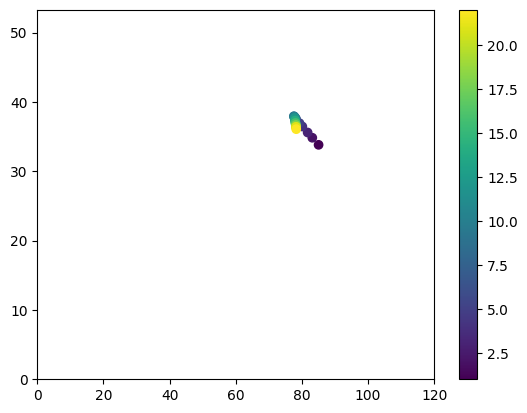

In [7]:
# we should probably add something that takes the data as it is and plots it 
# as it would be on the football field
## this means the x should be the same way that the football yardage is
### this brings up the question do we train with relative coordinates 
### or do we train with absolute coordinates

## 

play_one = week1_data[(football_week1['gameId'] == unique_plays_list[0][0]) & (football_week1['playId'] == unique_plays_list[0][1])]

x = play_one['x']
y = play_one['y']
frame_id = play_one['frameId']

plt.scatter(x, y, c=frame_id, cmap='viridis')
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.colorbar()
plt.show()

# Calculating Tackle Net Force

In [8]:
# this doesn't work but this method is faster than what i will do

def calc_fb_distance(data):
    data['football_x'] = data.groupby(['gameId', 'playId', 'frameId']).apply(
        lambda group: group.loc[group['displayName'] == 'football', 'x']
    ).reset_index(drop=True) 
    
    data['football_y'] = data.groupby(['gameId', 'playId', 'frameId']).apply(
        lambda group: group.loc[group['displayName'] == 'football', 'y']
    ).reset_index(drop=True)  

    data['fb_distance'] = data.groupby(['gameId', 'playId', 'frameId']).apply(
        lambda group: np.sqrt((group['x'] - group['football_x'])**2 + (group['y'] - group['football_y'])**2)
    ).reset_index(drop=True)

    return data
